In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch, Sbopen, VerticalPitch
import numpy as np

In [3]:
#read dataset
df = pd.read_csv('data/12112023/events_1729243.csv')

In [4]:
#watch what we have
df.head()

,league,season,game,id,game_id,period,minute,second,expanded_minute,type,...,goal_mouth_z,blocked_x,blocked_y,qualifiers,is_touch,is_shot,is_goal,card_type,related_event_id,related_player_id
0,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,2617209451,1729243,PreMatch,0,0.0,0,FormationSet,...,NaN,NaN,NaN,"[{'type': {'displayName': 'TeamFormation', 'va...",False,NaN,NaN,NaN,NaN,NaN
1,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,2617209477,1729243,PreMatch,0,0.0,0,FormationSet,...,NaN,NaN,NaN,"[{'type': {'displayName': 'JerseyNumber', 'val...",False,NaN,NaN,NaN,NaN,NaN
2,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,2617287459,1729243,FirstHalf,0,0.0,0,Start,...,NaN,NaN,NaN,[],False,NaN,NaN,NaN,NaN,NaN
3,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,2617287467,1729243,FirstHalf,0,0.0,0,Start,...,NaN,NaN,NaN,[],False,NaN,NaN,NaN,NaN,NaN
4,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,2617287487,1729243,FirstHalf,0,0.0,0,Pass,...,NaN,NaN,NaN,"[{'type': {'displayName': 'Zone', 'value': 56}...",True,NaN,NaN,NaN,NaN,NaN


In [5]:
#define columns format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   league             1599 non-null   object 
 1   season             1599 non-null   int64  
 2   game               1599 non-null   object 
 3   id                 1599 non-null   int64  
 4   game_id            1599 non-null   int64  
 5   period             1599 non-null   object 
 6   minute             1599 non-null   int64  
 7   second             1598 non-null   float64
 8   expanded_minute    1599 non-null   int64  
 9   type               1599 non-null   object 
 10  outcome_type       1599 non-null   object 
 11  team_id            1599 non-null   int64  
 12  team               1599 non-null   object 
 13  player_id          1581 non-null   float64
 14  player             1581 non-null   object 
 15  x                  1599 non-null   float64
 16  y                  1599 

## Heatmap

In [6]:
#Define dataframes by the teams
df_MC_hm = df[(df['team'] == 'Man City')&(df['outcome_type'] == 'Successful')][['minute', 'second', 'team', 'player','type', 'outcome_type','x','y', 'end_x','end_y']]
df_Ch_hm = df[(df['team'] == 'Chelsea')&(df['outcome_type'] == 'Successful')][['minute', 'second', 'team', 'player','type', 'outcome_type','x','y', 'end_x','end_y']]

<Axes: >

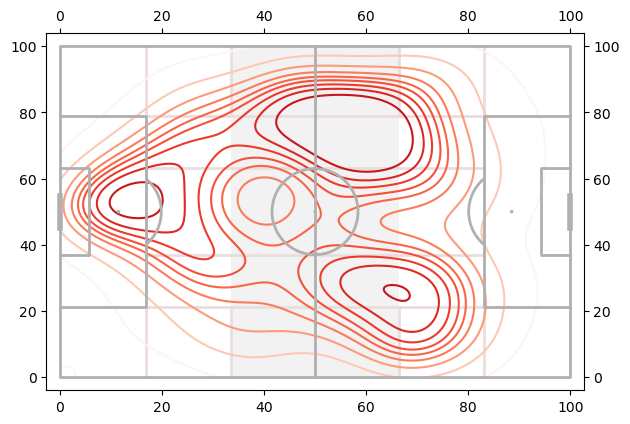

In [7]:
#make a pitch with data from OPTA and with a mention of the thirds and draw the heatmap for MC
pitch = Pitch(pitch_type='opta', positional=True, shade_middle=True, positional_color='#eadddd', shade_color='#f2f2f2', axis=True, label=True, tick=True, line_zorder =2 )  
fig, ax = pitch.draw()
pitch.kdeplot(df_MC_hm['x'], df_MC_hm['y'], ax=ax, cmap = 'Reds', zorder=1)

<Axes: >

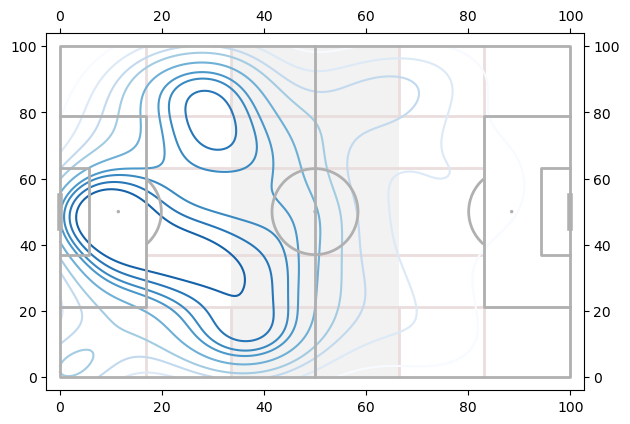

In [8]:
#make a pitch with data from OPTA and with a mention of the thirds and draw the heatmap for Chelsea
pitch = Pitch(pitch_type='opta', positional=True, shade_middle=True, positional_color='#eadddd', shade_color='#f2f2f2', axis=True, label=True, tick=True, line_zorder =2 )  
fig, ax = pitch.draw()
pitch.kdeplot(df_Ch_hm['x'], df_Ch_hm['y'], ax=ax, cmap = 'Blues', zorder=1)

## Passing networks

### Man city

In [9]:
#define a passer and a pass recipient and add the columns
df_MC_pn = df[df['team'] == 'Man City']
df_MC_pn['passer'] = df_MC_pn['player_id']
df_MC_pn['recipient'] = df_MC_pn['player_id'].shift(-1)

#Define the first substitution, all passes would be drown before the first sub.
subs = df_MC_pn[df_MC_pn['type'] == 'SubstitutionOff']
subs = subs['minute']
firstsub = subs.min()

#Define successful passes
MC_successful_passes = df_MC_pn[(df_MC_pn['type'] == 'Pass')&(df_MC_pn['outcome_type'] == 'Successful')&(df_MC_pn['minute'] < firstsub)]

C:\Users\ДмитроІєвлєв\AppData\Local\Temp\ipykernel_37168\1277649233.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MC_pn['passer'] = df_MC_pn['player_id']
C:\Users\ДмитроІєвлєв\AppData\Local\Temp\ipykernel_37168\1277649233.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MC_pn['recipient'] = df_MC_pn['player_id'].shift(-1)


In [10]:
#Define an average player's location and quantity of passes 
MC_average_locations = MC_successful_passes.groupby('passer').agg({'x': ['mean'], 'y': ['mean','count']})

In [11]:
MC_average_locations.columns = ['x', 'y', 'count']

In [12]:
MC_average_locations

,x,y,count
passer,,,
69778.0,51.050000,18.076667,30
121774.0,15.290323,55.116129,31
136741.0,52.521429,71.689286,28
297390.0,40.767647,64.567647,34
303139.0,50.658537,47.556098,41
313171.0,39.100000,38.969231,52
315227.0,54.475000,48.900000,8
331254.0,70.226316,22.452632,19
365409.0,60.200000,36.436842,19


In [13]:
#Count passes
pass_between = MC_successful_passes.groupby(['passer', 'recipient']).id.count().reset_index()
pass_between.rename({'id':'pass_count'}, axis='columns', inplace=True)

pass_between = pass_between.merge(MC_average_locations, left_on ='passer', right_index = True)
pass_between = pass_between.merge(MC_average_locations, left_on ='recipient', right_index = True, suffixes=['', '_end'])
print(pass_between)

      passer  recipient  pass_count          x          y  count      x_end  \
0    69778.0   121774.0           5  51.050000  18.076667     30  15.290323   
14  136741.0   121774.0           2  52.521429  71.689286     28  15.290323   
24  297390.0   121774.0           4  40.767647  64.567647     34  15.290323   
33  303139.0   121774.0           2  50.658537  47.556098     41  15.290323   
42  313171.0   121774.0          10  39.100000  38.969231     52  15.290323   
..       ...        ...         ...        ...        ...    ...        ...   
39  303139.0   388098.0           4  50.658537  47.556098     41  68.440000   
49  313171.0   388098.0           2  39.100000  38.969231     52  68.440000   
55  315227.0   388098.0           1  54.475000  48.900000      8  68.440000   
69  365409.0   388098.0           2  60.200000  36.436842     19  68.440000   
85  402664.0   388098.0           6  52.450000  82.921429     42  68.440000   

        y_end  count_end  
0   55.116129         31

In [14]:
#Define average statistics
pass_between.describe()

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
count,86.000000,86.0000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.00000
mean,278290.279070,281171.0000,3.651163,49.478334,52.463011,30.151163,51.356143,50.560762,29.55814
std,104253.030463,106439.0034,2.669071,14.464286,19.091937,13.136852,13.796384,20.524605,13.12349
min,69778.000000,69778.0000,1.000000,15.290323,18.076667,8.000000,15.290323,18.076667,8.00000
25%,136741.000000,176903.2500,2.000000,40.767647,38.969231,19.000000,43.240369,36.436842,19.00000
50%,313171.000000,313171.0000,3.000000,52.450000,48.900000,31.000000,52.450000,48.900000,30.00000
75%,356870.250000,365409.0000,5.750000,54.475000,70.830000,41.000000,60.200000,70.830000,41.00000
max,402664.000000,402664.0000,12.000000,70.226316,82.921429,52.000000,70.226316,82.921429,52.00000


In [15]:
#Reduct the pass_between to median pass_count
pass_between_reducted = pass_between[pass_between['pass_count']>3]

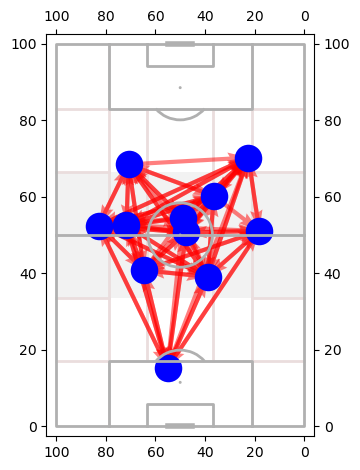

In [26]:
#Put the pass network on the pitch
pitch = VerticalPitch(pitch_type='opta', positional=True, shade_middle=True, positional_color='#eadddd', shade_color='#f2f2f2', axis=True, label=True, tick=True, line_zorder =2 )  
fig, ax = pitch.draw()

arrows = pitch.arrows(pass_between.x, pass_between.y, pass_between.x_end, pass_between.y_end, ax=ax, width =3, headwidth=3, color = 'red', zorder = 1, alpha = 0.5)

nodes = pitch.scatter(MC_average_locations.x, MC_average_locations.y, s =300, color = "blue", linewidth = 2.5, alpha =1, zorder = 1, ax=ax)

### Chelsea

In [68]:
#define a passer and a pass recipient and add the columns
df_Ch_pn = df[df['team'] == 'Chelsea']
df_Ch_pn['passer'] = df_Ch_pn['player_id']
df_Ch_pn['recipient'] = df_Ch_pn['player_id'].shift(-1)

#Define the first substitution, all passes would be drown before the first sub.
subs_Ch = df_Ch_pn[df_Ch_pn['type'] == 'SubstitutionOff']
subs_Ch = subs_Ch['minute']
firstsub_Ch = subs_Ch.min()

#Define successful passes
Ch_successful_passes = df_Ch_pn[(df_Ch_pn['type'] == 'Pass')&(df_Ch_pn['outcome_type'] == 'Successful')&(df_Ch_pn['minute'] < firstsub_Ch)]

C:\Users\ДмитроІєвлєв\AppData\Local\Temp\ipykernel_37168\2074840948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ch_pn['passer'] = df_Ch_pn['player_id']
C:\Users\ДмитроІєвлєв\AppData\Local\Temp\ipykernel_37168\2074840948.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ch_pn['recipient'] = df_Ch_pn['player_id'].shift(-1)


In [62]:
#Define an average player's location and quantity of passes 
Ch_average_locations = Ch_successful_passes.groupby('passer').agg({'x': ['mean'], 'y': ['mean','count']})
Ch_average_locations.columns = ['x', 'y', 'count']
Ch_average_locations

,x,y,count
passer,,,
28550.0,28.351724,58.068966,29
97692.0,66.050000,77.190000,10
300426.0,29.597059,32.829412,34
361330.0,43.459375,14.106250,32
362151.0,9.152174,45.560870,23
363496.0,36.950000,87.176923,26
369430.0,41.585714,68.780000,35
375621.0,60.055000,51.030000,20
395692.0,49.357895,33.852632,19


In [63]:
#Count passes
pass_between_Ch = Ch_successful_passes.groupby(['passer', 'recipient']).id.count().reset_index()
pass_between_Ch.rename({'id':'pass_count'}, axis='columns', inplace=True)

pass_between_Ch = pass_between_Ch.merge(Ch_average_locations, left_on ='passer', right_index = True)
pass_between_Ch = pass_between_Ch.merge(Ch_average_locations, left_on ='recipient', right_index = True, suffixes=['', '_end'])
print(pass_between_Ch)

      passer  recipient  pass_count          x          y  count      x_end  \
0    28550.0   300426.0           6  28.351724  58.068966     29  29.597059   
21  361330.0   300426.0           7  43.459375  14.106250     32  29.597059   
29  362151.0   300426.0           5   9.152174  45.560870     23  29.597059   
43  369430.0   300426.0           4  41.585714  68.780000     35  29.597059   
53  375621.0   300426.0           1  60.055000  51.030000     20  29.597059   
..       ...        ...         ...        ...        ...    ...        ...   
36  363496.0    97692.0           4  36.950000  87.176923     26  66.050000   
42  369430.0    97692.0           4  41.585714  68.780000     35  66.050000   
52  375621.0    97692.0           8  60.055000  51.030000     20  66.050000   
58  395692.0    97692.0           3  49.357895  33.852632     19  66.050000   
67  410175.0    97692.0           1  36.475000  46.441667     24  66.050000   

        y_end  count_end  
0   32.829412         34

In [64]:
#Define average statistics
pass_between_Ch.describe()

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,323702.736842,314227.631579,3.368421,39.467582,49.715122,25.434211,41.661536,51.883768,24.500000
std,116397.167547,124844.109213,2.314258,14.953408,20.086292,8.057023,14.593437,20.544905,8.782558
min,28550.000000,28550.000000,1.000000,9.152174,14.106250,4.000000,9.152174,14.106250,4.000000
25%,346104.000000,300426.000000,2.000000,29.597059,33.852632,20.000000,29.597059,33.852632,20.000000
50%,363496.000000,363496.000000,3.000000,41.585714,46.441667,26.000000,41.585714,51.030000,25.000000
75%,375621.000000,380638.750000,4.000000,49.357895,68.780000,32.000000,49.357895,68.780000,32.000000
max,426050.000000,426050.000000,10.000000,66.050000,87.176923,35.000000,66.050000,87.176923,35.000000


In [65]:
#Reduct the pass_between to median pass_count
pass_between_reducted_Ch = pass_between_Ch[pass_between_Ch['pass_count']>3]

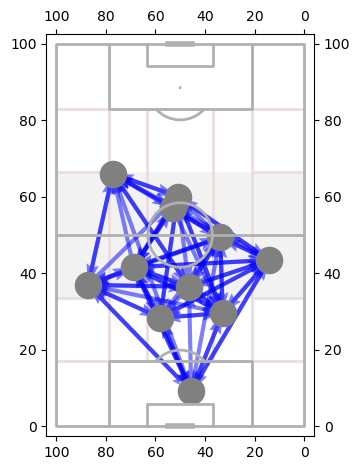

In [67]:
#Put the pass network on the pitch
pitch = VerticalPitch(pitch_type='opta', positional=True, shade_middle=True, positional_color='#eadddd', shade_color='#f2f2f2', axis=True, label=True, tick=True, line_zorder =2 )  
fig, ax = pitch.draw()

arrows = pitch.arrows(pass_between_Ch.x, pass_between_Ch.y, pass_between_Ch.x_end, pass_between_Ch.y_end, ax=ax, width =3, headwidth=3, color = 'blue', zorder = 1, alpha = 0.5)

nodes = pitch.scatter(Ch_average_locations.x, Ch_average_locations.y, s =300, color = "grey", linewidth = 2.5, alpha =1, zorder = 1, ax=ax)

## Voronoi diagramm

In [52]:
mc_x = MC_average_locations['x'].tolist()
mc_y = MC_average_locations['y'].tolist()
mc = []

ch_x = []
ch_y = []
ch = []

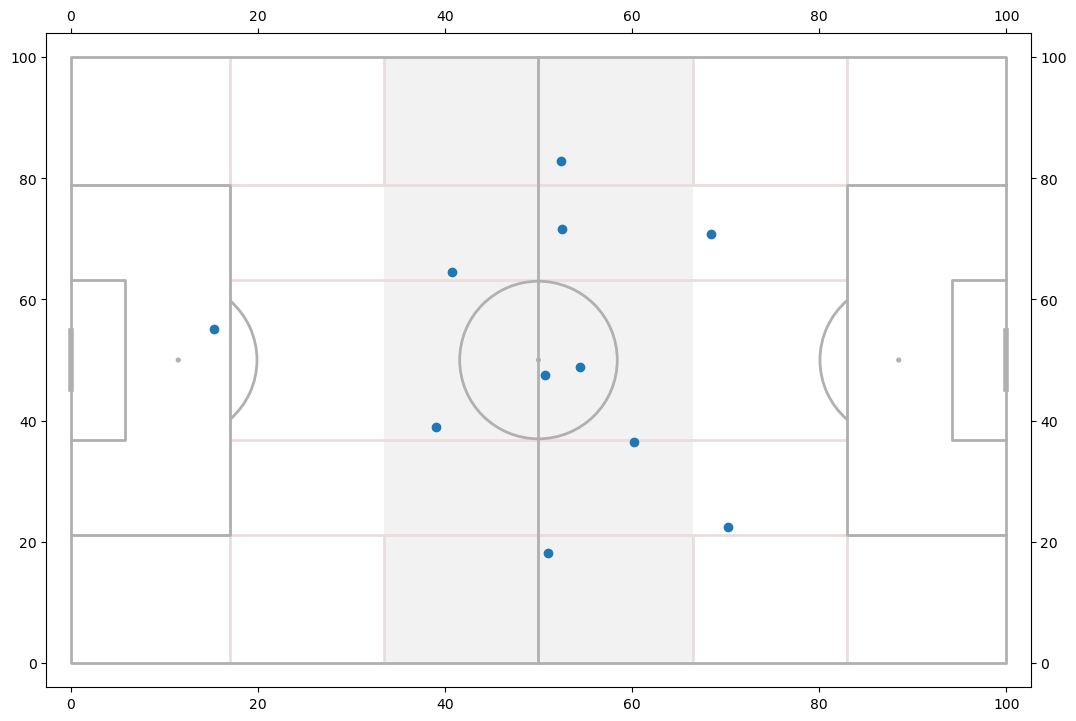

In [56]:
fig, ax = plt.subplots(figsize=(13, 8.5))

pitch = Pitch(pitch_type='opta', positional=True, shade_middle=True, positional_color='#eadddd', shade_color='#f2f2f2', axis=True, label=True, tick=True, line_zorder =2 ) 

pitch.draw(ax=ax)

pitch.scatter(mc_x, mc_y, ax=ax)

In [51]:
mc_x

[51.05,
 15.290322580645162,
 52.521428571428565,
 40.76764705882353,
 50.65853658536585,
 39.1,
 54.475,
 70.22631578947369,
 60.199999999999996,
 68.44,
 52.45]